In [0]:
# Import pandas 
import pandas as pd
import numpy as np

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
from google.colab import files
files.upload()

Saving bank.csv to bank.csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

In [5]:
bankdf = pd.read_csv('bank.csv')
bankdf.head(n=5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(bankdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
bankdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
pd.isnull(bankdf).count() # There are no missing values

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [9]:
# Dropping the columns
bankdf.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
bankdf.head(n=5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
bankdf.Gender[bankdf.Gender == 'Male'] = 1
bankdf.Gender[bankdf.Gender == 'Female'] = 2

bankdf['Geography'] = bankdf['Geography'].astype('category')
bankdf['Geography'] = bankdf['Geography'].cat.codes

bankdf.head(n=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,0,2,42,8,159660.80,3,1,0,113931.57,1
3,699,0,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0


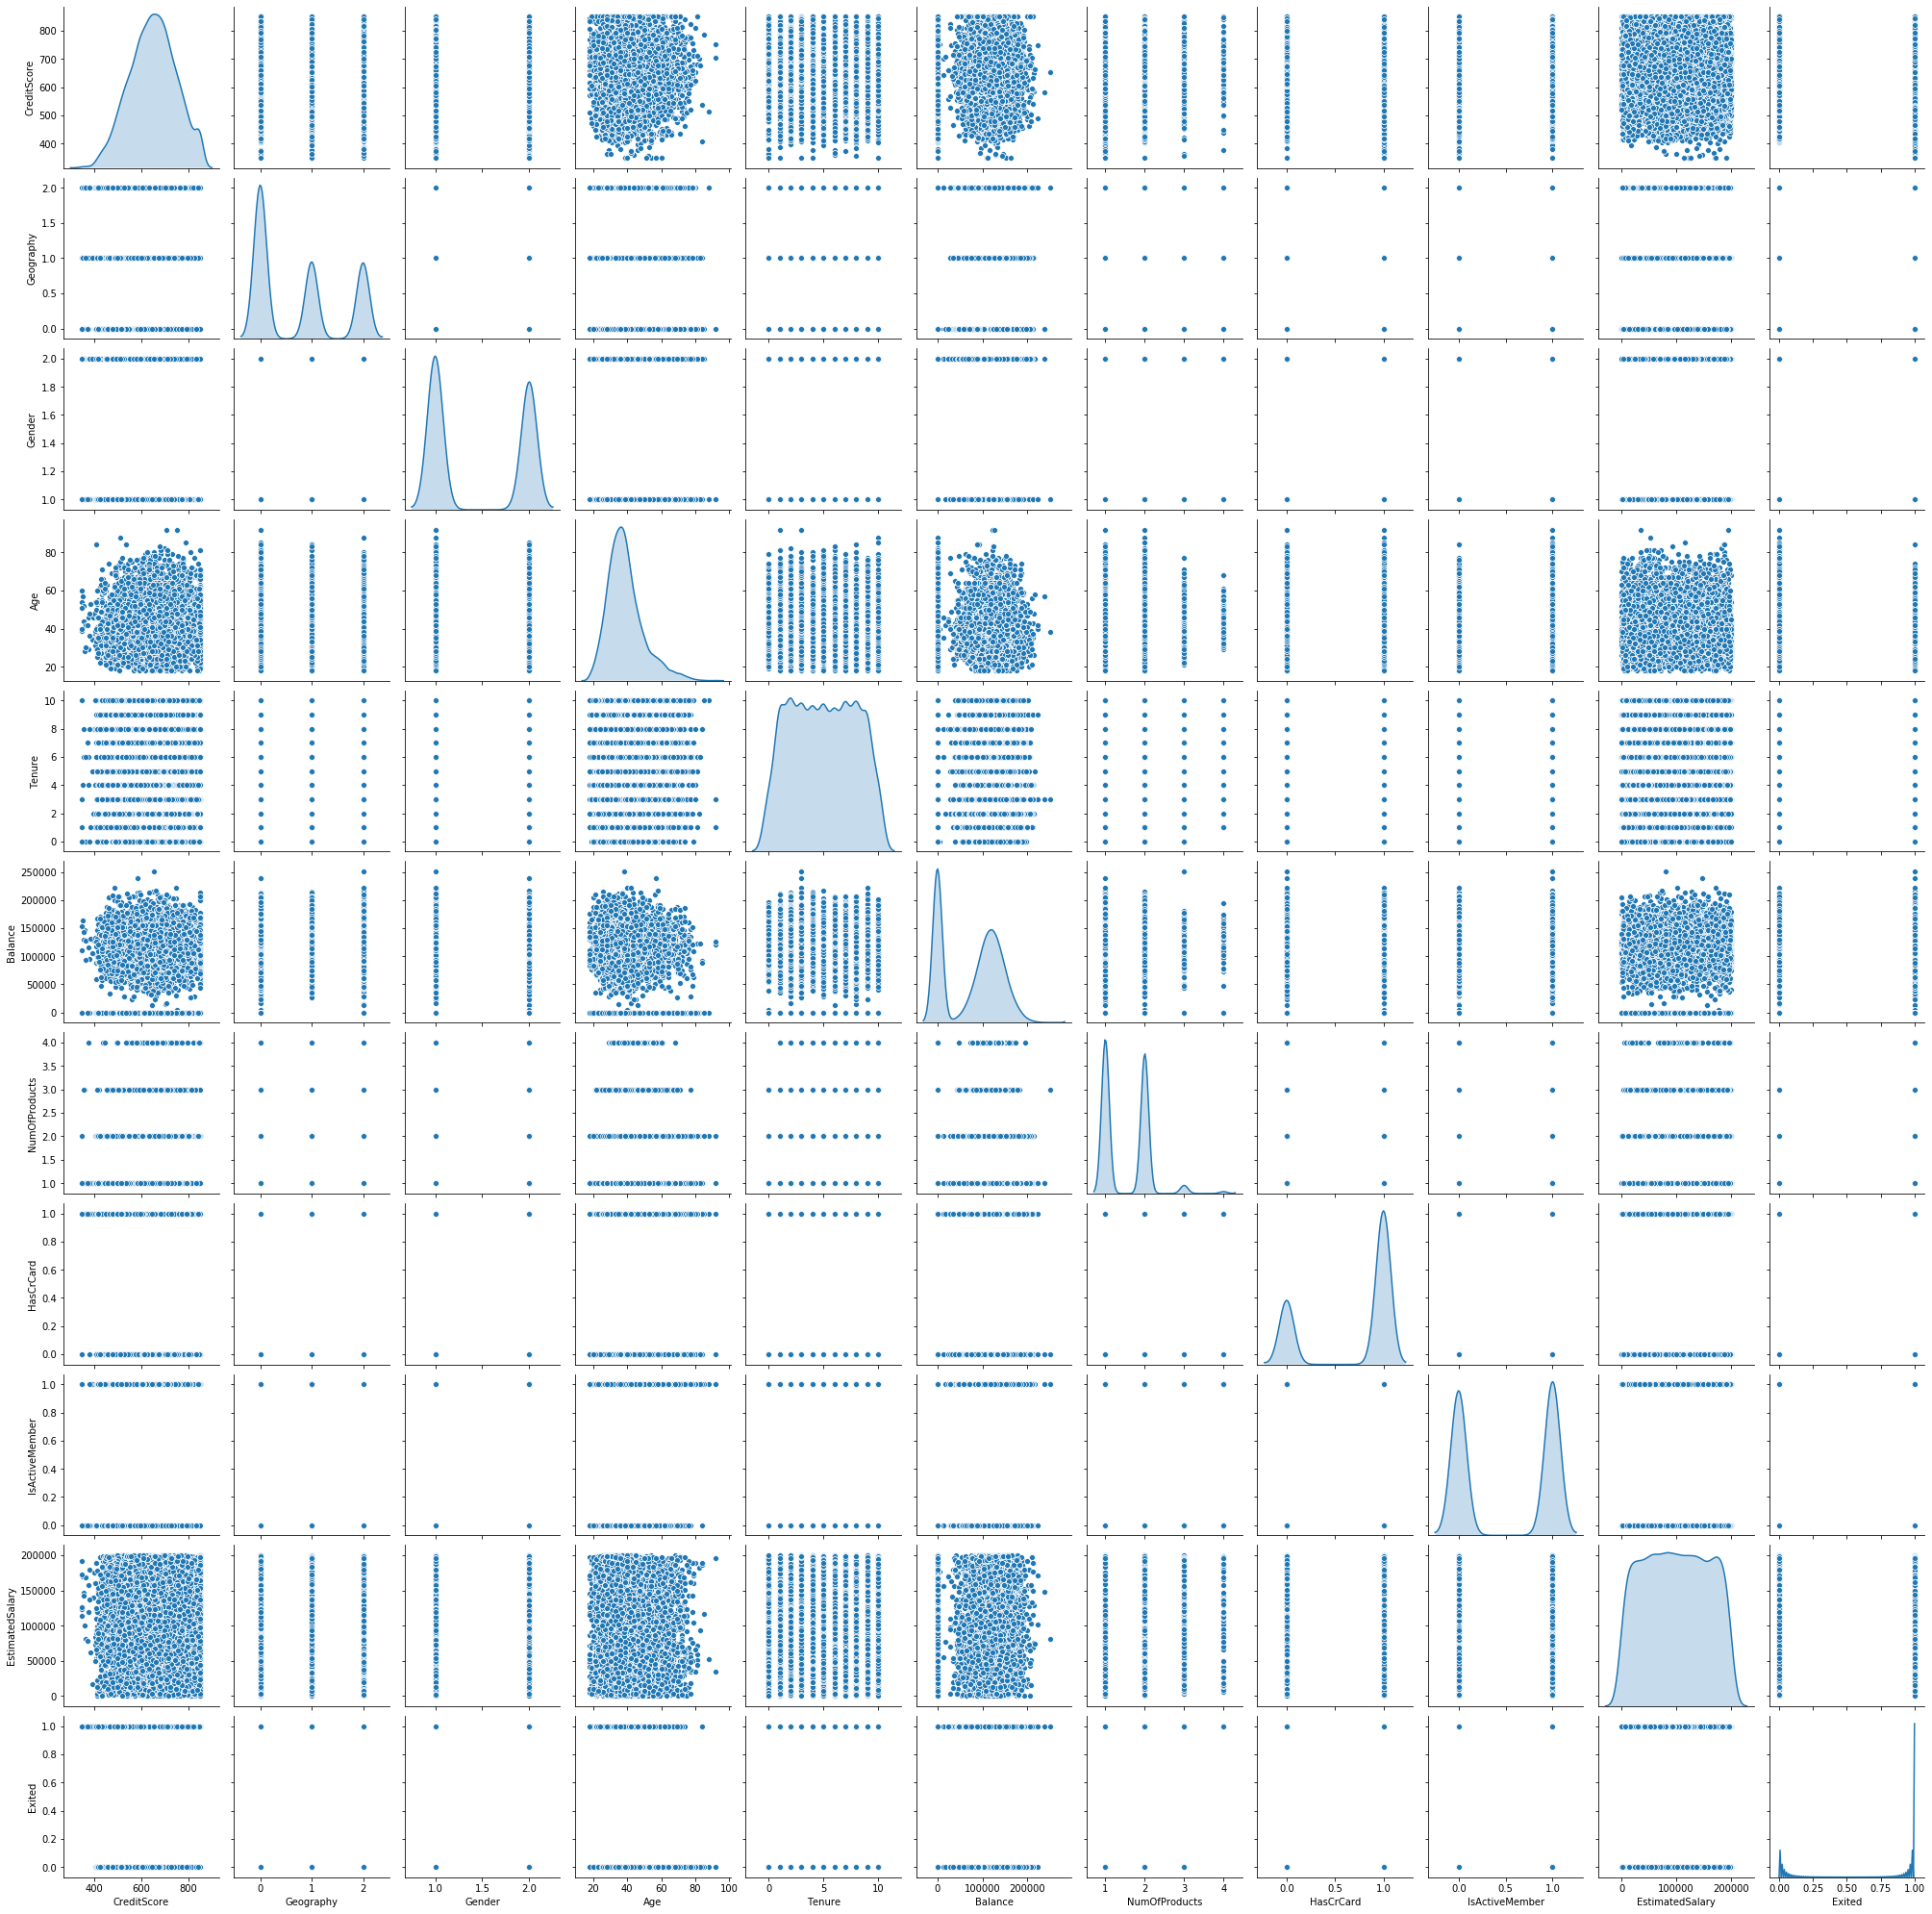

In [11]:
import seaborn as sns

sns.pairplot(data=bankdf, diag_kind = 'kde')

In [35]:
# Distinguishing the feature and target set and dividing data into training and test set

bankdf.drop(['Geography'], axis = 1, inplace = True)

array = bankdf.values

# Specify the data 
X = array[:,0:8] 

# Specify the target labels
Y = array[:,9]

print(X)

print(y)



[[619 2 42 ... 1 1 1]
 [608 2 41 ... 1 0 1]
 [502 2 42 ... 3 1 0]
 ...
 [709 2 36 ... 1 0 1]
 [772 1 42 ... 2 1 0]
 [792 2 28 ... 1 1 0]]
[1 0 1 ... 1 1 0]


In [0]:
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(3,input_shape=(9,),activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))


Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 111us/sample - loss: 0.6944 - accuracy: 0.6496 - val_loss: 0.6489 - val_accuracy: 0.6734
Epoch 2/100
7000/7000 [==============================] - 0s 61us/sample - loss: 0.6396 - accuracy: 0.6732 - val_loss: 0.6067 - val_accuracy: 0.6983
Epoch 3/100
7000/7000 [==============================] - 0s 63us/sample - loss: 0.6035 - accuracy: 0.7030 - val_loss: 0.5798 - val_accuracy: 0.7322
Epoch 4/100
7000/7000 [==============================] - 0s 64us/sample - loss: 0.5811 - accuracy: 0.7342 - val_loss: 0.5634 - val_accuracy: 0.7653
Epoch 5/100
7000/7000 [==============================] - 0s 62us/sample - loss: 0.5677 - accuracy: 0.7649 - val_loss: 0.5536 - val_accuracy: 0.7919
Epoch 6/100
7000/7000 [==============================] - 0s 62us/sample - loss: 0.5598 - accuracy: 0.7844 - val_loss: 0.5479 - val_accuracy: 0.8013
Epoch 7/100
7000/7000 [==============================] - 0s 62u

In [41]:
model.predict(X_test[0:1])

array([[0.33333433, 0.33333397, 0.3333317 ]], dtype=float32)

In [42]:
y_test[0:1]

array([0])